# Algorithm 1

In [113]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import csv
from metrics import test
from cdlib import NodeClustering
from incremental_communites_algoritihm import get_communities_from_incremental_elements
import matplotlib.pyplot as plt
import pandas as pd
import random

### Real World

In [114]:
global_graph=nx.Graph()

In [115]:
with open("real_world_datasets/1998_Nov.csv", mode='r')as file:
        csvFile = csv.DictReader(file)
        for line in csvFile:
            global_graph.add_edge(int(line['source']), int(
                line['target']), weight=int(line['weight']))
with open("real_world_datasets/1998_Dec.csv", mode='r')as file:
    csvFile = csv.DictReader(file)
    for line in csvFile:
        if global_graph.has_edge(int(line['source']), int(line['target'])):
            global_graph[int(line['source'])][int(
                line['target'])]['weight'] += int(line['weight'])
        else:
            global_graph.add_edge(int(line['source']), int(
                line['target']), weight=int(line['weight']))
communities = nx_comm.louvain_communities(global_graph)

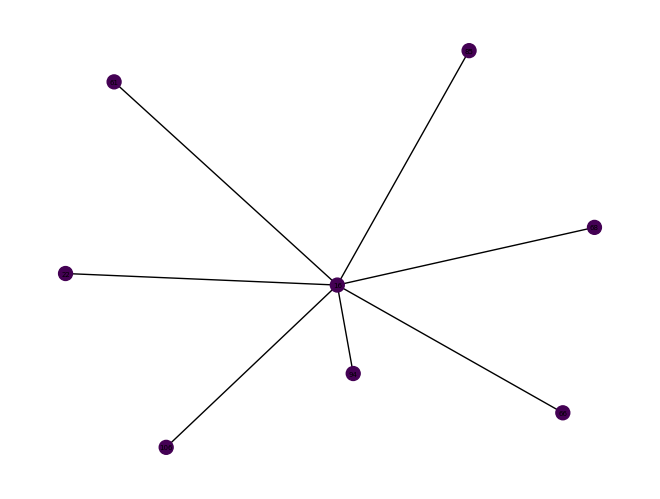

In [116]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [118]:
def incremental_graphs(year, months):
        G = nx.Graph()
        for month in months:
            with open("real_world_datasets/"+str(year)+"_"+month+".csv", mode='r')as file:
                csvFile = csv.DictReader(file)
                for line in csvFile:
                    G.add_edge(int(line['source']), int(
                        line['target']), weight=int(line['weight']))
                    if global_graph.has_edge(int(line['source']), int(line['target'])):
                        global_graph[int(line['source'])][int(
                            line['target'])]['weight'] += int(line['weight'])
                    else:
                        global_graph.add_edge(int(line['source']), int(
                            line['target']), weight=int(line['weight']))
        return G
months1 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
months2 = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [119]:
subG = incremental_graphs(1999, months1)
global_graph, communities = get_communities_from_incremental_elements(communities, subG, 0.5, 3.5, global_graph)

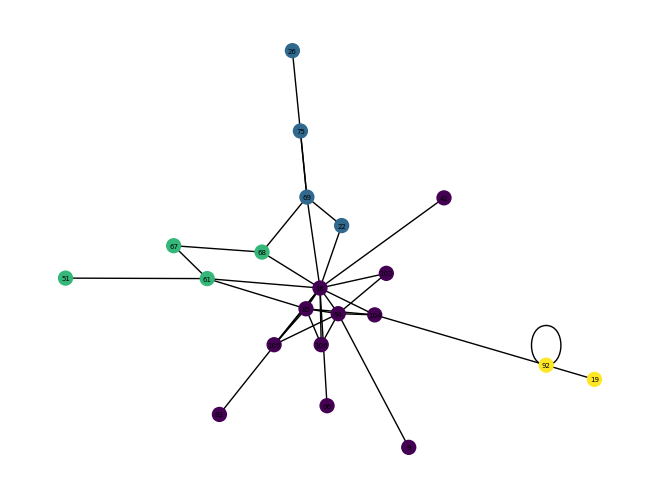

In [120]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [121]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.223132
Conductance,0.269048
Expansion,0.698864
Cut-Ratio,0.045951


In [122]:
subG = incremental_graphs(1999, months2)
global_graph,communities = get_communities_from_incremental_elements(communities, subG, 0.5, 3.5, global_graph)

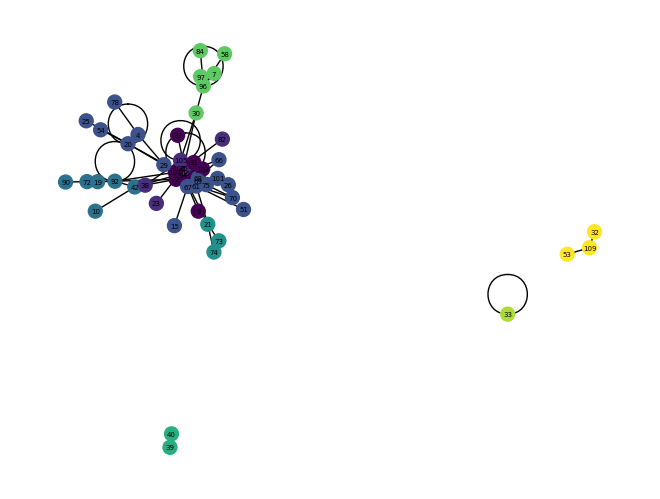

In [123]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [124]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.362025
Conductance,0.216490
Expansion,0.845316
Cut-Ratio,0.019322


In [125]:
subG = incremental_graphs(2000, months1)
global_graph,communities = get_communities_from_incremental_elements(communities, subG, 0.5, 3.5, global_graph)

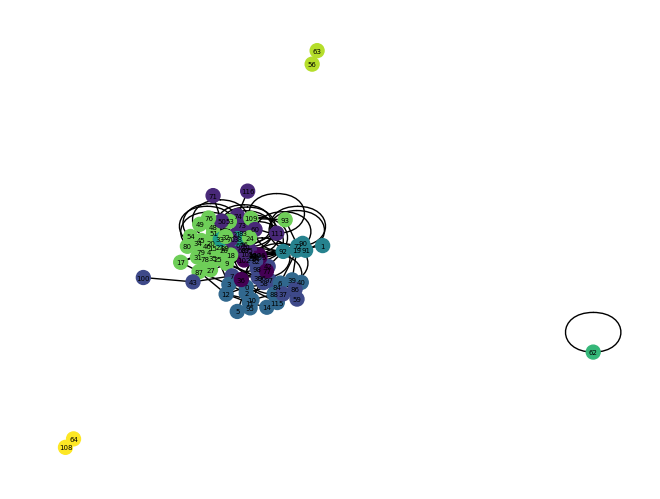

In [126]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [127]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.605889
Conductance,0.297709
Expansion,2.312743
Cut-Ratio,0.026239


In [128]:
subG = incremental_graphs(2000, months2)
global_graph,communities = get_communities_from_incremental_elements(communities, subG, 0.5, 3.5, global_graph)

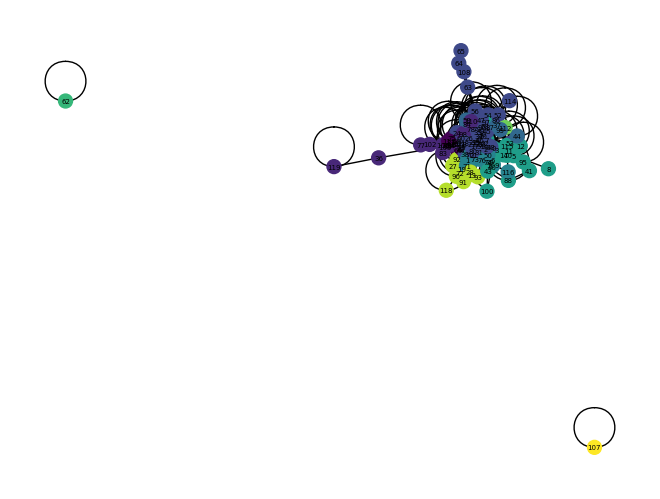

In [129]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [130]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.681322
Conductance,0.397480
Expansion,4.754921
Cut-Ratio,0.046743


### Real World - ia-contacts_dublin

In [131]:
global_graph=nx.Graph()
with open("ia-contacts_dublin/time1.csv", mode='r')as file:
        csvFile = csv.DictReader(file)
        for line in csvFile:
            global_graph.add_edge(int(line['Source']), int(
                line['Target']), weight=1)
communities = nx_comm.louvain_communities(global_graph)

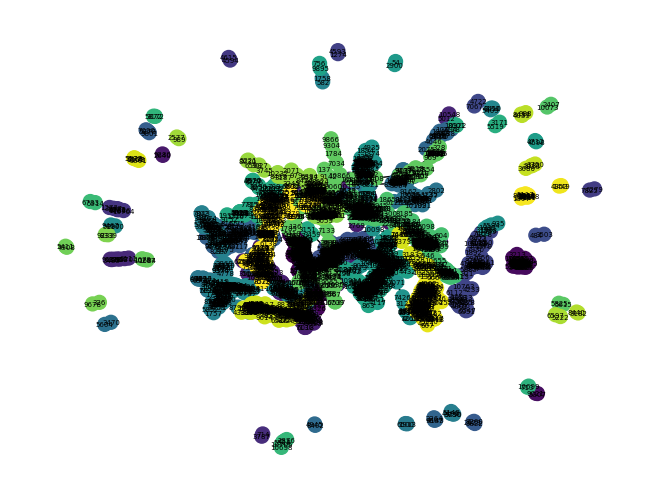

In [132]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [135]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.928827
Conductance,0.005192
Expansion,0.047401
Cut-Ratio,0.000018


In [137]:
SubG = nx.Graph()
with open("ia-contacts_dublin/time2.csv", mode='r')as file:
    csvFile = csv.DictReader(file)
    for line in csvFile:
        SubG.add_edge(int(line['Source']), int(
            line['Target']), weight=1)
        if global_graph.has_edge(int(line['Source']), int(line['Target'])):
            global_graph[int(line['Source'])][int(
                line['Target'])]['weight'] += 1
        else:
            global_graph.add_edge(int(line['Source']), int(
                line['Target']), weight=1)
global_graph,communities = get_communities_from_incremental_elements(communities, subG, 0.5, 3.5, global_graph)

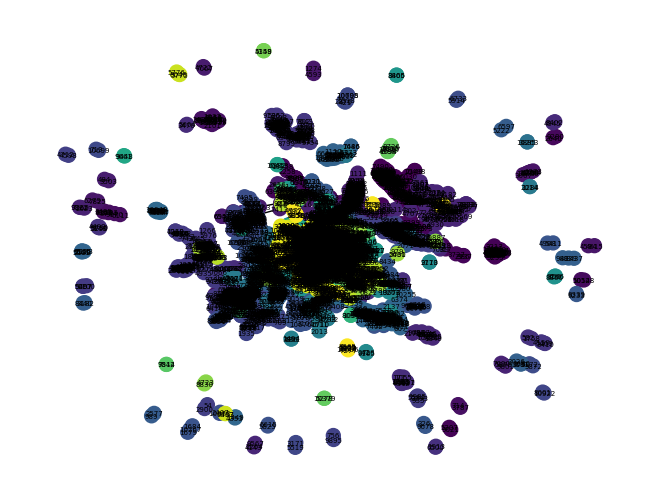

In [138]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [139]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.972459
Conductance,0.035062
Expansion,0.223522
Cut-Ratio,0.000041


In [151]:
SubG = nx.Graph()
with open("ia-contacts_dublin/time3.csv", mode='r')as file:
    csvFile = csv.DictReader(file)
    for line in csvFile:
        SubG.add_edge(int(line['Source']), int(
            line['Target']), weight=1)
        if global_graph.has_edge(int(line['Source']), int(line['Target'])):
            global_graph[int(line['Source'])][int(
                line['Target'])]['weight'] += 1
        else:
            global_graph.add_edge(int(line['Source']), int(
                line['Target']), weight=1)
global_graph,communities = get_communities_from_incremental_elements(communities, subG, 0.5, 3.5, global_graph)

In [152]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.958058
Conductance,0.074088
Expansion,0.491919
Cut-Ratio,0.000169


In [153]:
SubG = nx.Graph()
with open("ia-contacts_dublin/time3.csv", mode='r')as file:
    csvFile = csv.DictReader(file)
    for line in csvFile:
        SubG.add_edge(int(line['Source']), int(
            line['Target']), weight=1)
        if global_graph.has_edge(int(line['Source']), int(line['Target'])):
            global_graph[int(line['Source'])][int(
                line['Target'])]['weight'] += 1
        else:
            global_graph.add_edge(int(line['Source']), int(
                line['Target']), weight=1)
global_graph,communities = get_communities_from_incremental_elements(communities, subG, 0.5, 3.5, global_graph)

In [154]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.962051
Conductance,0.071528
Expansion,0.479011
Cut-Ratio,0.000165


### Synthetic Graph

In [155]:
def intial_graph():
    G = nx.LFR_benchmark_graph(
        n=250, tau1=3, tau2=1.5, mu=0.1, average_degree=5, min_community=20, seed=10)
    G.remove_edges_from(nx.selfloop_edges(G))
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.randint(1, 7)
    return G

def incremental_graphs():
    def generate_random_numbers(min_num, max_num, count):
        for i in range(count):
            yield random.randint(min_num, max_num)

    num_range = (20, 70)
    num_count = random.randint(10, 30)
    node_list = list(generate_random_numbers(*num_range, num_count))
    num_nodes = len(node_list)
    G = nx.Graph()
    G.add_nodes_from(node_list)
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if random.random() < 0.5:
                weight = random.randint(1, 7)
                G.add_edge(i, j, weight=weight)
                if global_graph.has_edge(i, j):
                    global_graph[i][j]['weight'] += weight
                else:
                    global_graph.add_edge(i, j, weight=weight)
    return G



In [156]:
global_graph=intial_graph()

In [157]:
communities=nx_comm.louvain_communities(global_graph)

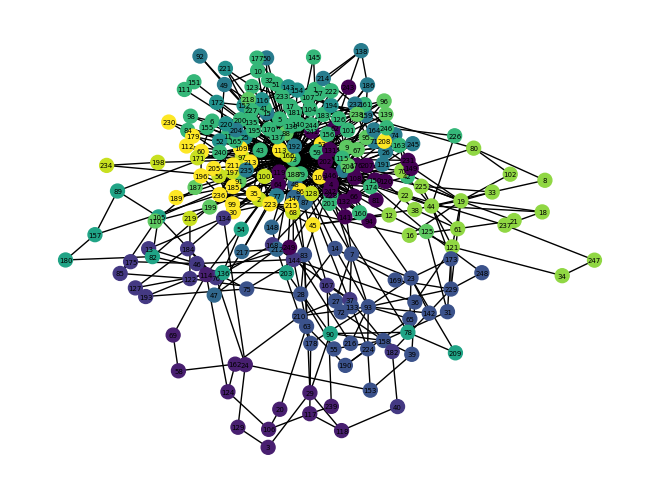

In [158]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [159]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.534898
Conductance,0.432917
Expansion,1.835140
Cut-Ratio,0.008031


In [160]:
subG = incremental_graphs()
global_graph,communities = get_communities_from_incremental_elements(communities, subG, 0.5, 3.5, global_graph)

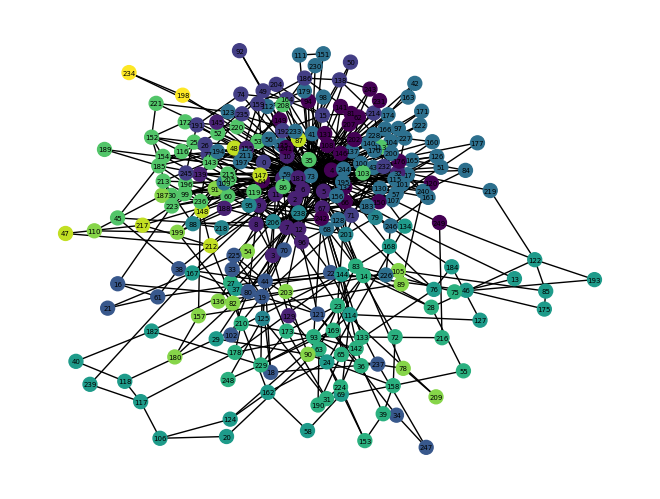

In [161]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [162]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.516916
Conductance,0.441971
Expansion,2.042302
Cut-Ratio,0.008982


In [163]:
subG = incremental_graphs()
global_graph,communities = get_communities_from_incremental_elements(communities, subG, 0.5, 3.5, global_graph)

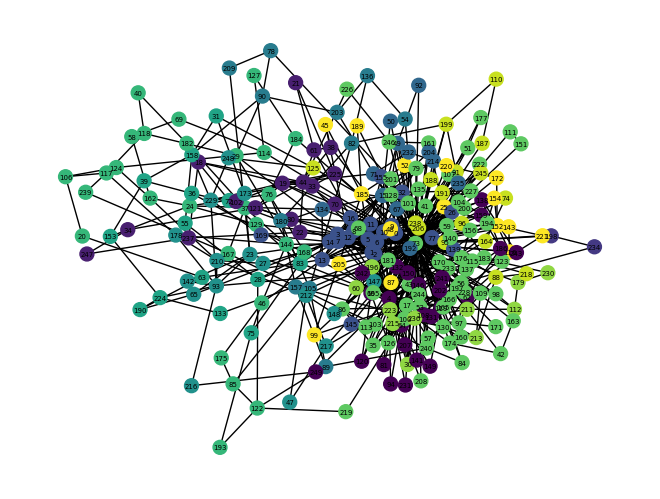

In [164]:
cmap = {}
for i in range(len(communities)):
    for node in communities[i]:
        cmap[node] = i+2
# plt.figure(figsize=(10, 6))
nx.draw(global_graph, node_color=[cmap.get(node, 1) for node in global_graph.nodes()], with_labels=True, node_size=100, font_size=5)
plt.show()

In [165]:
comm = [list(c) for c in communities]
comm = NodeClustering(comm, graph=None)
results=test(global_graph,comm)
results = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
results

,Value
Modularity,0.522881
Conductance,0.440820
Expansion,2.034060
Cut-Ratio,0.008932
